In [12]:
import pandas as pd
 
# from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

import pickle 
# from linearmodels.asset_pricing import LinearFactorModel
 
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2024-12')[0]


ff_factor_data.tail()
path = r"/Users/lucasmoyer/development/two-dolla/datasets/factor_data/f_f_5_factor.pkl"
with open(path, 'wb') as handle:
    pickle.dump(ff_factor_data, handle,protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
# Obtain the 17 industry portfolios at a monthly frequency
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2023', end='2023-10')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
print(ff_portfolio_data.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 167 entries, 2010-01 to 2023-11
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    10 non-null     float64
 1   Mines   10 non-null     float64
 2   Oil     10 non-null     float64
 3   Clths   10 non-null     float64
 4   Durbl   10 non-null     float64
 5   Chems   10 non-null     float64
 6   Cnsum   10 non-null     float64
 7   Cnstr   10 non-null     float64
 8   Steel   10 non-null     float64
 9   FabPr   10 non-null     float64
 10  Machn   10 non-null     float64
 11  Cars    10 non-null     float64
 12  Trans   10 non-null     float64
 13  Utils   10 non-null     float64
 14  Rtail   10 non-null     float64
 15  Finan   10 non-null     float64
 16  Other   10 non-null     float64
dtypes: float64(17)
memory usage: 23.5 KB
None


In [15]:
ff_portfolio_data.tail()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2023-07,1.86,7.68,6.90,0.65,3.01,4.59,-1.41,4.32,2.96,2.18,4.87,1.43,4.16,2.34,1.89,5.95,2.64
2023-08,-4.69,-6.16,1.61,-6.41,0.94,-5.34,1.86,-1.79,-2.02,0.56,-1.16,-4.33,-5.24,-5.74,-0.63,-4.06,-2.63
2023-09,-5.39,-5.49,2.64,-5.13,-7.77,-6.40,-4.90,-8.85,-5.01,-6.54,-7.73,-2.95,-7.68,-5.47,-6.28,-2.47,-5.57
2023-10,-3.87,-5.04,-6.69,3.37,-11.23,-7.02,-2.40,-6.84,-4.48,-5.88,-6.89,-16.52,-2.25,0.65,1.55,-2.25,-1.76
2023-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


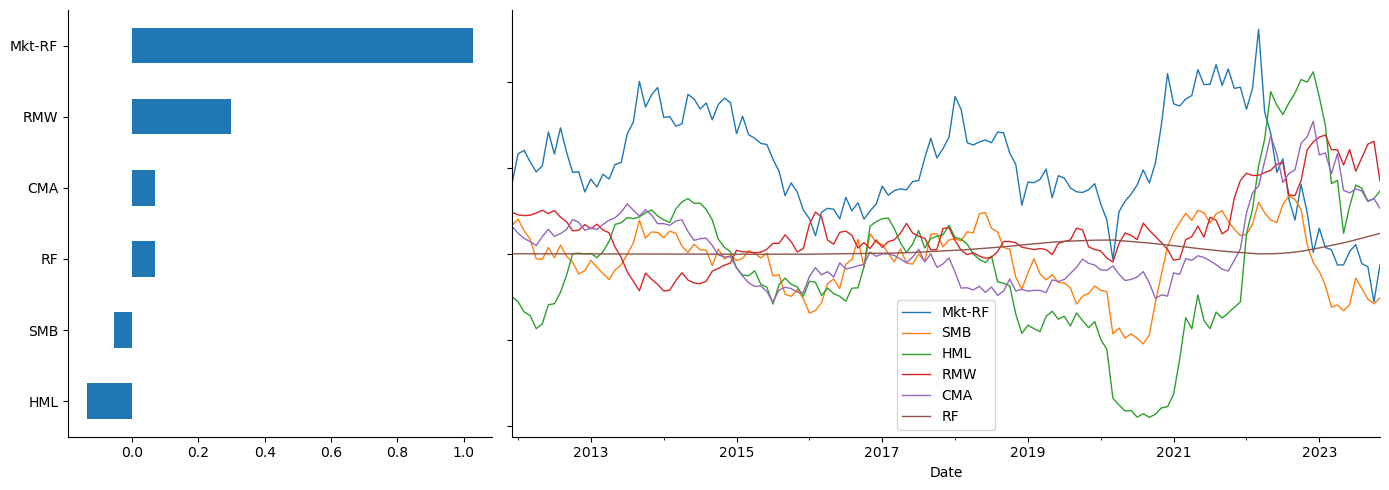

In [16]:
window = 24  # months
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
ff_factor_data.mean().sort_values().plot.barh(ax=ax1)
ff_factor_data.rolling(window).mean().dropna().plot(lw=1,
                                             figsize=(14, 5),
                                             sharey=True,
                                             ax=ax2)
sns.despine()
plt.tight_layout()